In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../input/train.csv")

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
## count

<AxesSubplot:xlabel='count'>

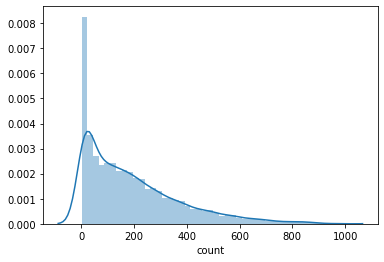

In [5]:
sns.distplot(df["count"])

In [6]:
####Extrainging hours

In [7]:
from datetime import datetime
df["datetime"] = pd.to_datetime(df["datetime"])

In [8]:
df["hour"] = df["datetime"].dt.hour

<AxesSubplot:xlabel='hour', ylabel='count'>

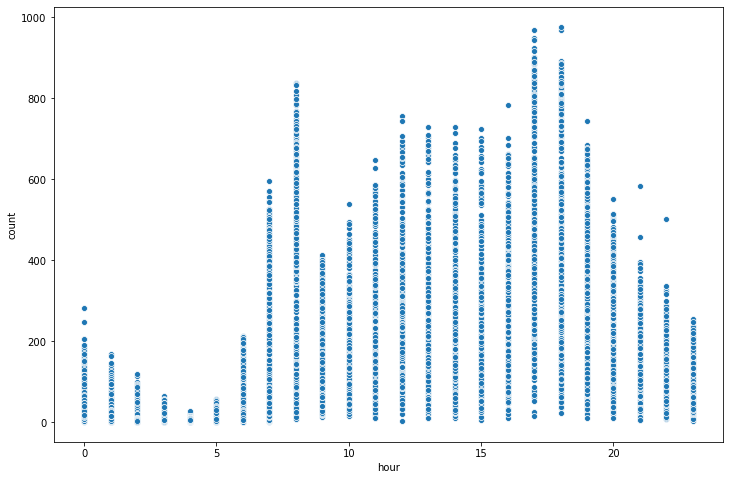

In [9]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="hour",y="count",data=df)

In [10]:
import math

In [11]:
df["hour"]=df["hour"].apply(lambda x : (math.cos(2*math.pi/24*x)))

In [12]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1.000000
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0.965926
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0.866025
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0.707107
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0.500000


In [13]:
##Season

<AxesSubplot:xlabel='season', ylabel='count'>

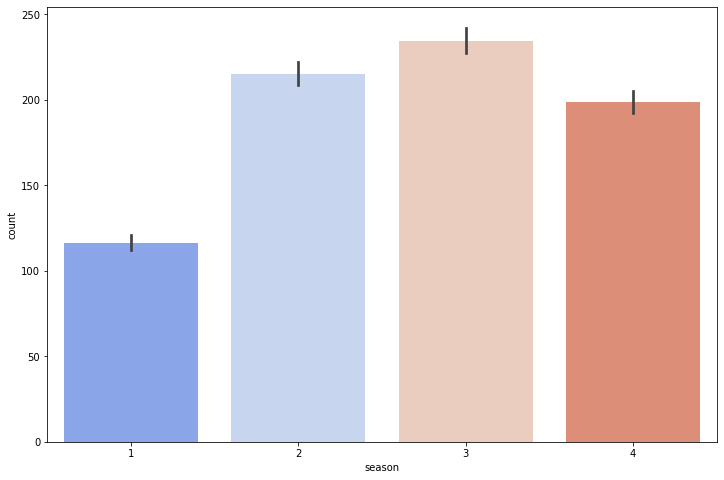

In [14]:
plt.figure(figsize=(12,8))
sns.barplot(x="season",y="count",data=df,palette="coolwarm")

In [15]:
season_map=df.groupby("season").mean()["count"].to_dict()

In [16]:
df["season"]=df["season"].map(season_map)

In [17]:
####

In [18]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,116.343261,0,0,1,9.84,14.395,81,0.0,3,13,16,1.000000
1,2011-01-01 01:00:00,116.343261,0,0,1,9.02,13.635,80,0.0,8,32,40,0.965926
2,2011-01-01 02:00:00,116.343261,0,0,1,9.02,13.635,80,0.0,5,27,32,0.866025
3,2011-01-01 03:00:00,116.343261,0,0,1,9.84,14.395,75,0.0,3,10,13,0.707107
4,2011-01-01 04:00:00,116.343261,0,0,1,9.84,14.395,75,0.0,0,1,1,0.500000


In [19]:
### holiday

<AxesSubplot:xlabel='holiday', ylabel='count'>

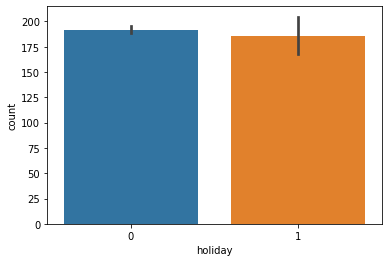

In [20]:
sns.barplot(x="holiday",y="count",data=df)

In [21]:
holiday_map=df.groupby("holiday").mean()["count"].to_dict()

In [22]:
df["holiday"] = df["holiday"].map(holiday_map)

<AxesSubplot:>

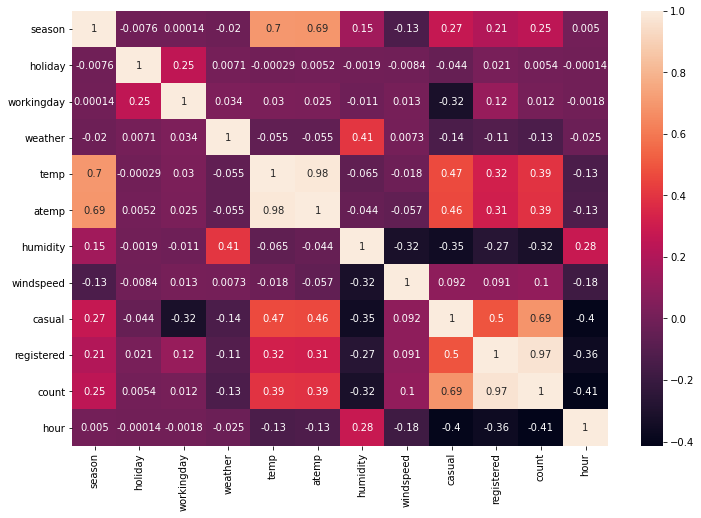

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [24]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,116.343261,191.741655,0,1,9.84,14.395,81,0.0,3,13,16,1.000000
1,2011-01-01 01:00:00,116.343261,191.741655,0,1,9.02,13.635,80,0.0,8,32,40,0.965926
2,2011-01-01 02:00:00,116.343261,191.741655,0,1,9.02,13.635,80,0.0,5,27,32,0.866025
3,2011-01-01 03:00:00,116.343261,191.741655,0,1,9.84,14.395,75,0.0,3,10,13,0.707107
4,2011-01-01 04:00:00,116.343261,191.741655,0,1,9.84,14.395,75,0.0,0,1,1,0.500000


In [25]:
### working doay

<AxesSubplot:xlabel='workingday', ylabel='count'>

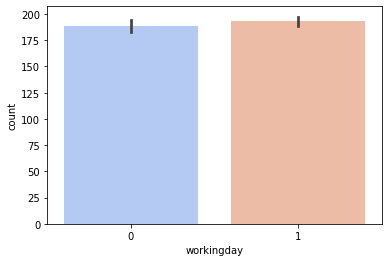

In [26]:
sns.barplot(x="workingday",y="count",data=df,palette="coolwarm")

In [27]:
working_day_map=df.groupby("workingday").mean()["count"].to_dict()

In [28]:
df["workingday"] = df.workingday.map(working_day_map)

In [29]:
df["workingday"]

0        188.506621
1        188.506621
2        188.506621
3        188.506621
4        188.506621
            ...    
10881    193.011873
10882    193.011873
10883    193.011873
10884    193.011873
10885    193.011873
Name: workingday, Length: 10886, dtype: float64

In [30]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,116.343261,191.741655,188.506621,1,9.84,14.395,81,0.0,3,13,16,1.000000
1,2011-01-01 01:00:00,116.343261,191.741655,188.506621,1,9.02,13.635,80,0.0,8,32,40,0.965926
2,2011-01-01 02:00:00,116.343261,191.741655,188.506621,1,9.02,13.635,80,0.0,5,27,32,0.866025
3,2011-01-01 03:00:00,116.343261,191.741655,188.506621,1,9.84,14.395,75,0.0,3,10,13,0.707107
4,2011-01-01 04:00:00,116.343261,191.741655,188.506621,1,9.84,14.395,75,0.0,0,1,1,0.500000


In [31]:
##weather

<AxesSubplot:xlabel='weather', ylabel='count'>

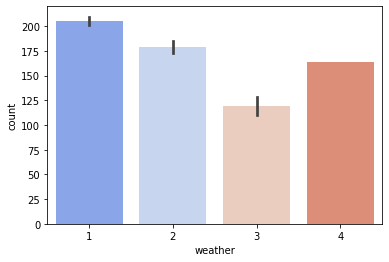

In [32]:
sns.barplot(x="weather",y="count",data=df,palette="coolwarm")

In [33]:
weather_map=df.groupby("weather").mean()["count"].to_dict()

In [34]:
df.weather=df.weather.map(weather_map)

<AxesSubplot:xlabel='temp'>

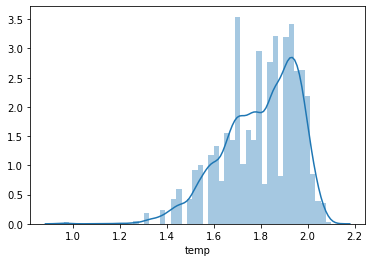

In [35]:
sns.distplot((df.temp)**(1/5))

<AxesSubplot:xlabel='atemp'>

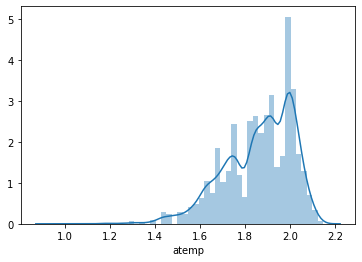

In [36]:
sns.distplot((df.atemp)**(1/5))

<AxesSubplot:xlabel='temp'>

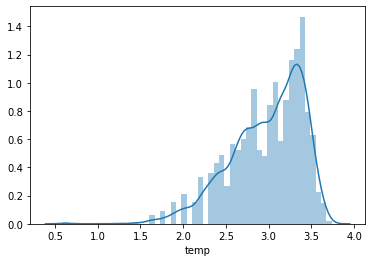

In [37]:
sns.distplot(np.log(df.temp+1))

In [38]:
df[["temp","atemp","count"]].corr()

,temp,atemp,count
temp,1.000000,0.984948,0.394454
atemp,0.984948,1.000000,0.389784
count,0.394454,0.389784,1.000000


<AxesSubplot:xlabel='temp'>

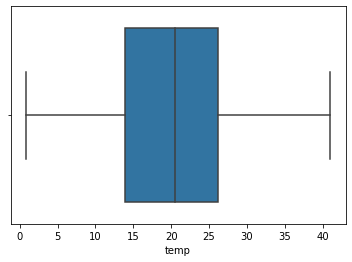

In [39]:
sns.boxplot(df.temp)

<AxesSubplot:xlabel='atemp'>

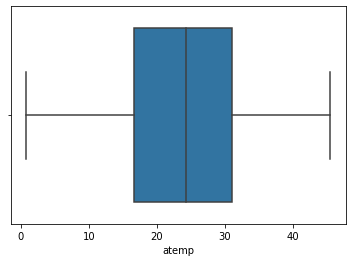

In [40]:
sns.boxplot(df.atemp)

In [41]:
df= df.drop("atemp",axis=1)

In [42]:
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,116.343261,191.741655,188.506621,205.236791,9.84,81,0.0,3,13,16,1.000000
1,2011-01-01 01:00:00,116.343261,191.741655,188.506621,205.236791,9.02,80,0.0,8,32,40,0.965926
2,2011-01-01 02:00:00,116.343261,191.741655,188.506621,205.236791,9.02,80,0.0,5,27,32,0.866025
3,2011-01-01 03:00:00,116.343261,191.741655,188.506621,205.236791,9.84,75,0.0,3,10,13,0.707107
4,2011-01-01 04:00:00,116.343261,191.741655,188.506621,205.236791,9.84,75,0.0,0,1,1,0.500000


In [43]:
##humidity

<AxesSubplot:xlabel='humidity'>

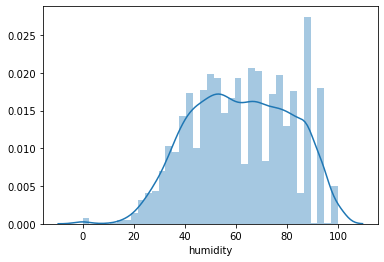

In [44]:
sns.distplot(df.humidity)

<AxesSubplot:xlabel='humidity'>

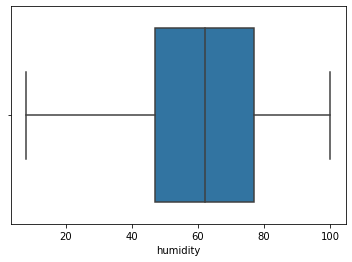

In [45]:
sns.boxplot(df.humidity.replace(0,df["humidity"].mean()))

<AxesSubplot:xlabel='humidity'>

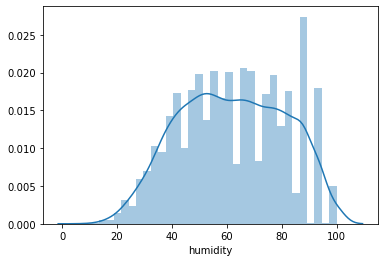

In [46]:
sns.distplot(df.humidity.replace(0,df["humidity"].mean()))

In [47]:
df[df.humidity==0]

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour
1091,2011-03-10 00:00:00,116.343261,191.741655,193.011873,118.846333,13.94,0,16.9979,3,0,3,1.000000e+00
1092,2011-03-10 01:00:00,116.343261,191.741655,193.011873,118.846333,13.94,0,16.9979,0,2,2,9.659258e-01
1093,2011-03-10 02:00:00,116.343261,191.741655,193.011873,118.846333,13.94,0,16.9979,0,1,1,8.660254e-01
1094,2011-03-10 05:00:00,116.343261,191.741655,193.011873,118.846333,14.76,0,12.9980,1,2,3,2.588190e-01
1095,2011-03-10 06:00:00,116.343261,191.741655,193.011873,118.846333,14.76,0,22.0028,0,12,12,6.123234e-17
1096,2011-03-10 07:00:00,116.343261,191.741655,193.011873,118.846333,15.58,0,15.0013,1,36,37,-2.588190e-01
1097,2011-03-10 08:00:00,116.343261,191.741655,193.011873,118.846333,15.58,0,19.0012,1,43,44,-5.000000e-01
1098,2011-03-10 09:00:00,116.343261,191.741655,193.011873,118.846333,16.40,0,15.0013,1,23,24,-7.071068e-01
1099,2011-03-10 10:00:00,116.343261,191.741655,193.011873,118.846333,16.40,0,11.0014,0,17,17,-8.660254e-01
1100,2011-03-10 11:00:00,116.343261,191.741655,193.011873,118.846333,16.40,0,16.9979,6,5,11,-9.659258e-01


In [48]:
df_copy = df.copy()

In [49]:
df_copy = df_copy["humidity"].replace(0,np.nan)

<AxesSubplot:xlabel='humidity'>

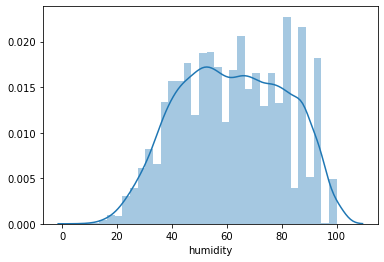

In [50]:
sns.distplot(df_copy.ffill())

<AxesSubplot:xlabel='humidity'>

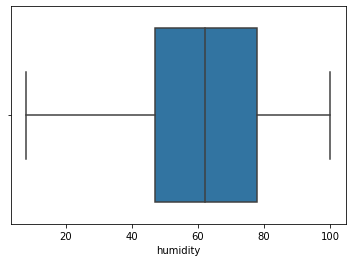

In [51]:
sns.boxplot(df_copy.ffill())

In [52]:
df_copy[df_copy==0]

Series([], Name: humidity, dtype: float64)

In [53]:
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,116.343261,191.741655,188.506621,205.236791,9.84,81,0.0,3,13,16,1.000000
1,2011-01-01 01:00:00,116.343261,191.741655,188.506621,205.236791,9.02,80,0.0,8,32,40,0.965926
2,2011-01-01 02:00:00,116.343261,191.741655,188.506621,205.236791,9.02,80,0.0,5,27,32,0.866025
3,2011-01-01 03:00:00,116.343261,191.741655,188.506621,205.236791,9.84,75,0.0,3,10,13,0.707107
4,2011-01-01 04:00:00,116.343261,191.741655,188.506621,205.236791,9.84,75,0.0,0,1,1,0.500000


In [54]:
### windspped

In [55]:
df["windspeed"].value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
50.0021       1
51.9987       1
Name: windspeed, dtype: int64

<AxesSubplot:xlabel='windspeed'>

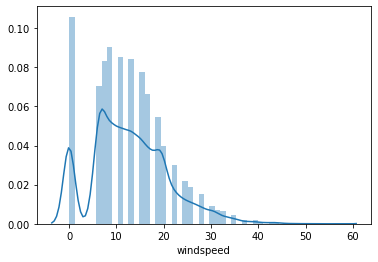

In [56]:
sns.distplot(df["windspeed"])

<AxesSubplot:xlabel='windspeed'>

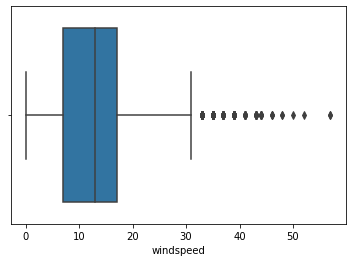

In [57]:
sns.boxplot(df["windspeed"])

<AxesSubplot:xlabel='windspeed', ylabel='count'>

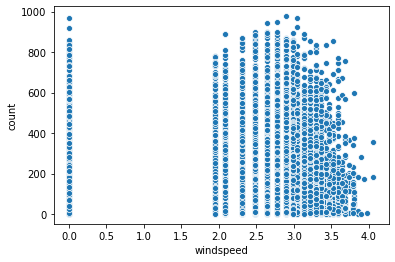

In [58]:
sns.scatterplot(x=np.log(df["windspeed"]+1),y=df["count"],data=df)

<AxesSubplot:xlabel='windspeed'>

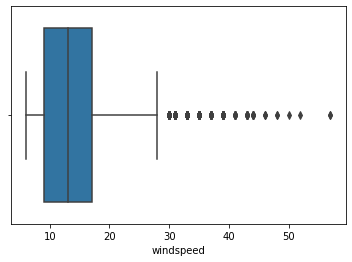

In [59]:
sns.boxplot(df["windspeed"].replace(0,df["windspeed"].median()))

In [60]:
# df["windspeed"]=df["windspeed"].replace(0,np.nan)

In [61]:
# sns.boxplot(df["windspeed"].fillna(df["windspeed"].mean()))

In [62]:
np.ceil(1+np.log(len(df)))

11.0

In [64]:
df["windspeed"]=pd.cut(df["windspeed"],bins=11,labels=False)

In [65]:
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,116.343261,191.741655,188.506621,205.236791,9.84,81,0,3,13,16,1.000000
1,2011-01-01 01:00:00,116.343261,191.741655,188.506621,205.236791,9.02,80,0,8,32,40,0.965926
2,2011-01-01 02:00:00,116.343261,191.741655,188.506621,205.236791,9.02,80,0,5,27,32,0.866025
3,2011-01-01 03:00:00,116.343261,191.741655,188.506621,205.236791,9.84,75,0,3,10,13,0.707107
4,2011-01-01 04:00:00,116.343261,191.741655,188.506621,205.236791,9.84,75,0,0,1,1,0.500000


In [66]:
##casual

<AxesSubplot:xlabel='casual'>

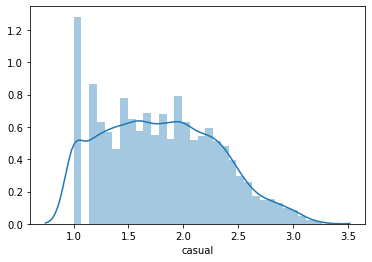

In [77]:
sns.distplot((df["casual"]+1)**(1/5))

<AxesSubplot:xlabel='casual'>

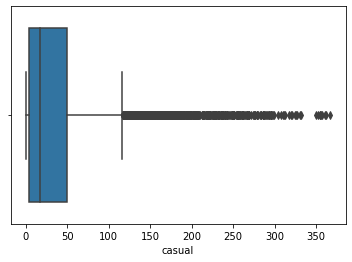

In [75]:
sns.boxplot(df["casual"])

In [78]:
df["casual"] = df["casual"]**(1/5)

<AxesSubplot:xlabel='registered'>

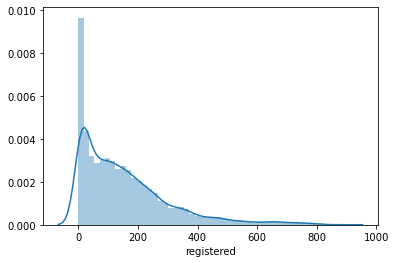

In [80]:
sns.distplot(df["registered"])

In [81]:
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,116.343261,191.741655,188.506621,205.236791,9.84,81,0,1.245731,13,16,1.000000
1,2011-01-01 01:00:00,116.343261,191.741655,188.506621,205.236791,9.02,80,0,1.515717,32,40,0.965926
2,2011-01-01 02:00:00,116.343261,191.741655,188.506621,205.236791,9.02,80,0,1.379730,27,32,0.866025
3,2011-01-01 03:00:00,116.343261,191.741655,188.506621,205.236791,9.84,75,0,1.245731,10,13,0.707107
4,2011-01-01 04:00:00,116.343261,191.741655,188.506621,205.236791,9.84,75,0,0.000000,1,1,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,198.988296,191.741655,193.011873,205.236791,15.58,50,5,1.475773,329,336,0.258819
10882,2012-12-19 20:00:00,198.988296,191.741655,193.011873,205.236791,14.76,57,2,1.584893,231,241,0.500000
10883,2012-12-19 21:00:00,198.988296,191.741655,193.011873,205.236791,13.94,61,2,1.319508,164,168,0.707107
10884,2012-12-19 22:00:00,198.988296,191.741655,193.011873,205.236791,13.94,61,1,1.643752,117,129,0.866025


In [83]:
import numpy as np

In [85]:
np.round(12.3333222,2)

12.33

In [86]:
df_test = pd.read_csv("../input/test.csvt.csv")

In [87]:
df_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [88]:
df_test = df["datetime"]

In [91]:
df_Date_df=pd.DataFrame(df_test)

In [94]:
df_Date_df.to_excel("datetime_test.xlsx",index=False)